In [4]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
(x_train , y_train) , (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

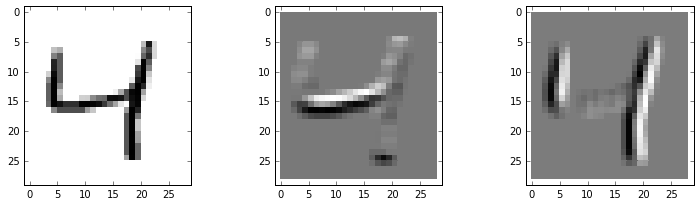

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

id_img = 2
myfil1 = np.array([[1,1,1],
                   [1,1,1],
                   [-2,-2,-2]],dtype = float)
myfil2 = np.array([[-2,1,1],
                   [-2,1,1],
                   [-2,1,1]], dtype = float)

x_img = x_train[id_img, : ,  : , 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h,img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

# フィルター処理
for ih in range(img_h-3):
    for iw in range(img_w-3):
        img_part = x_img[ih:ih + 3, iw:iw+3]
        out_img1[ih + 1, iw + 1] = np.dot(img_part.reshape(-1),myfil1.reshape(-1))
        out_img2[ih + 1, iw + 1] = np.dot(img_part.reshape(-1),myfil2.reshape(-1))
        
plt.figure(1, figsize=(12,3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1,3,1)
plt.pcolor(1 - x_img)
plt.xlim(-1,29)
plt.ylim(29,-1)
plt.subplot(1,3,2)
plt.pcolor(-out_img1)
plt.xlim(-1,29)
plt.ylim(29,-1)
plt.subplot(1,3,3)
plt.pcolor(-out_img2)
plt.xlim(-1,29)
plt.ylim(29,-1)
plt.show()

In [9]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(8, (3,3) , padding='same',
                 input_shape=(28,28,1), activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000,epochs = 20,verbose=1, validation_data=(x_test,y_test))
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:' , score[0])
print('Test accuracy:' , score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 199us/step - loss: 0.7708 - acc: 0.8152 - val_loss: 0.3386 - val_acc: 0.9044
Epoch 2/20
60000/60000 [==============================] - 11s 180us/step - loss: 0.3161 - acc: 0.9093 - val_loss: 0.2741 - val_acc: 0.9214
Epoch 3/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.2648 - acc: 0.9255 - val_loss: 0.2408 - val_acc: 0.9341
Epoch 4/20
60000/60000 [==============================] - 11s 180us/step - loss: 0.2299 - acc: 0.9354 - val_loss: 0.2120 - val_acc: 0.9427
Epoch 5/20
60000/60000 [==============================] - 12s 196us/step - loss: 0.2019 - acc: 0.9440 - val_loss: 0.1900 - val_acc: 0.9485
Epoch 6/20
60000/60000 [==============================] - 12s 195us/step - loss: 0.1807 - acc: 0.9501 - val_loss: 0.1710 - val_acc: 0.9541
Epoch 7/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.1620 - acc: 0.9556 - val_loss: 0.

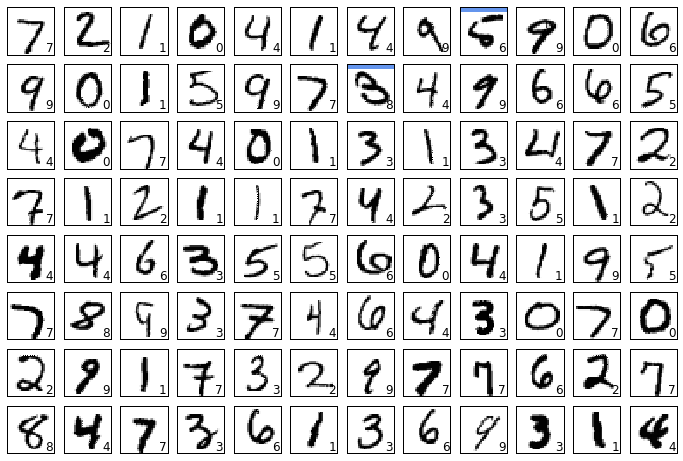

In [11]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test)
    plt.figure(2, figsize=(12,8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8,12,i+1)
        x = x_test[i, :]
        x = x.reshape(28,28)
        plt.pcolor(1-x)
        wk = y[i,:]
        prediction = np.argmax(wk)
        plt.text(22,25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i,:]):
            plt.plot([0,27],[1,1], color='cornflowerblue', linewidth=5)
        plt.xlim(0,27)
        plt.ylim(27,0)
        plt.xticks([], "")
        plt.yticks([], "")

show_prediction()
plt.show()
    

In [ ]:
plt.figure(1, figsize=(12,2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2, hspace= 0.2)
plt.subplot(2,9,10)
id_img = 12
x_img = x_test[id_img, : , : ,0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h,img_w)

plt.pcolor(-x_img)
plt.xlim(0,img_h)
plt